In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("tmdb_5000_movies.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
C= data['vote_average'].mean()
C

6.092171559442011

In [7]:
m= data['vote_count'].quantile(0.9)
m

1838.4000000000015

In [9]:
q_movies = data.copy().loc[data['vote_count'] >= m]
q_movies.shape

(481, 20)

In [10]:
# Calculation of weighted rating based on the IMDB formula
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [14]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


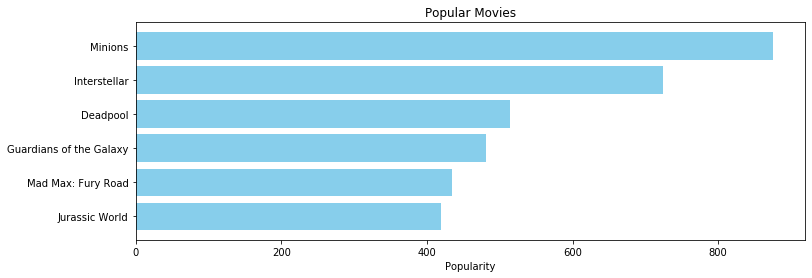

In [16]:
# Trending Now - Popular movies in dataset
pop= data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

In [21]:
# Tredning Now - TMDB API
from tmdbv3api import TMDb
import json
import requests
from tmdbv3api import Movie

tmdb = TMDb()

tmdb_movie = Movie()
 
response = requests.get('https://api.themoviedb.org/3/movie/popular?api_key=23e48adb1f662882c97ada4b5569ff31&language=en-US&page=1')

data_json = response.json()

for i in range(0, 20):
    print(data_json['results'][i]['title'])

Master and Commander: The Far Side of the World
The Outpost
Hamilton
Ad Astra
Artemis Fowl
Desperados
Greyhound
Ang Pangarap Kong Holdap
The Old Guard
Journey to China: The Mystery of Iron Mask
Joker
Sonic the Hedgehog
Harry Potter and the Philosopher's Stone
Avengers: Infinity War
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)
The Bad Lieutenant: Port of Call - New Orleans
The Hobbit: The Battle of the Five Armies
Inception
Interstellar
Frozen II
